<a href="https://colab.research.google.com/github/farrukh61/Implementing-KNN-and-SVM-Semester-Assignment/blob/main/Social_Media_Ads__KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Social Media Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.drop('User ID', axis = 1, inplace=True)

## Exploratoty Data Analysis

In [ ]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
# social media ads missing value check
df.isnull().any()

Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<AxesSubplot:>

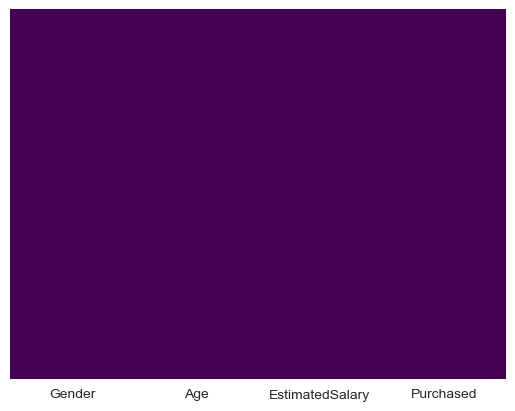

In [ ]:
# using seaborn's heatmap to visualize nan values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

### Value Counts

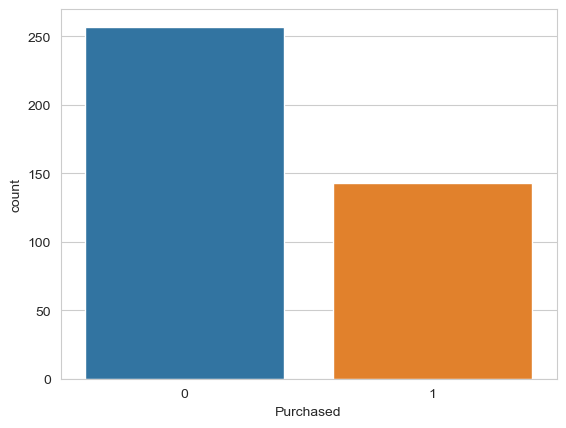

In [ ]:
# count of Purchased classes
sns.set_style('whitegrid')
sns.countplot(x='Purchased',data=df);

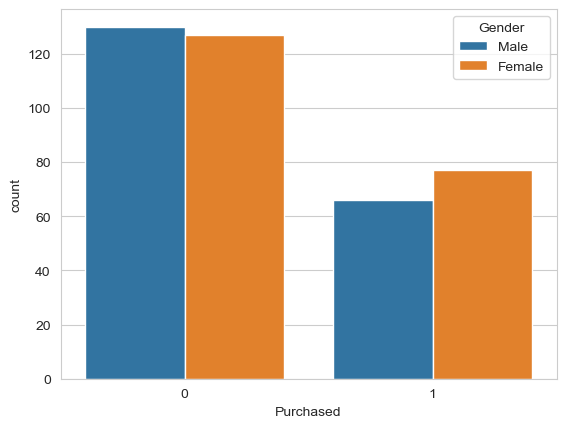

In [ ]:
# count of Purchased class based on Gender
sns.set_style('whitegrid')
sns.countplot(x = 'Purchased', hue = 'Gender',data=df);

Text(0.5, 1.0, 'Correlation Heatmap')

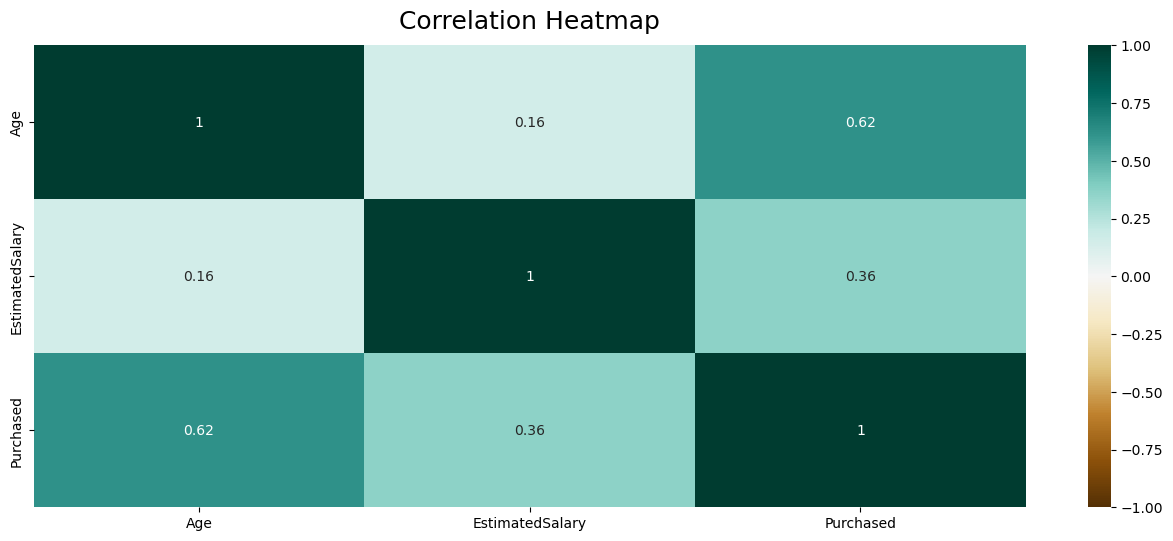

In [ ]:
# co relation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
# one hot encoding for 'Gender'
df = pd.get_dummies(df, columns = ['Gender'],drop_first = True)
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [ ]:
X = df.drop('Purchased',axis=1)
y = df.Purchased
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=3345)
class_counts = y.value_counts(normalize=True)
print(f'Before split:\n {class_counts}')

class_counts = y_train.value_counts(normalize=True)
print('After split\n',class_counts)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Before split:
 0    0.6425
1    0.3575
Name: Purchased, dtype: float64
After split
 0    0.6375
1    0.3625
Name: Purchased, dtype: float64


# Training KNN classifier 

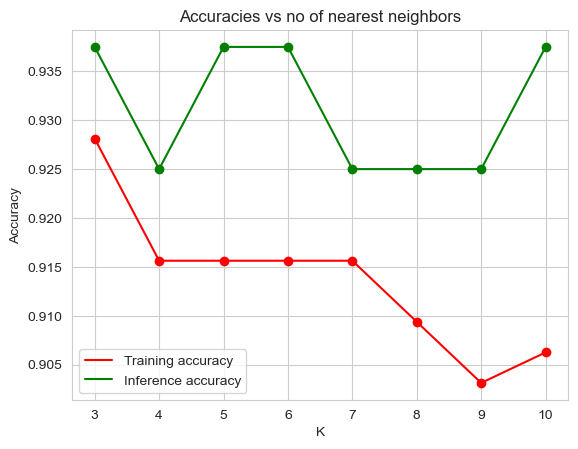

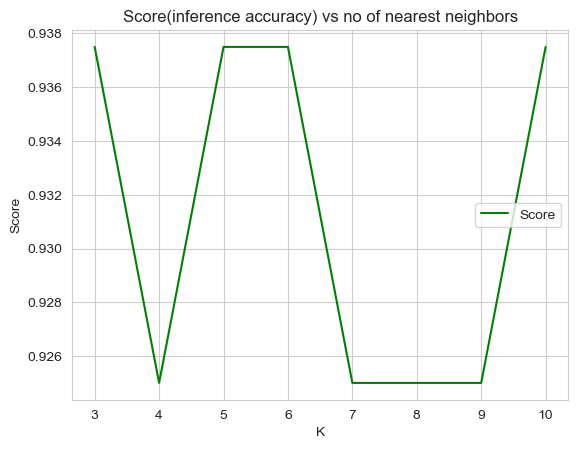

In [ ]:
# create KNN classifier 
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
accuracy_train = []

accuracy_test = []
model_score = []
K = [3,4,5,6,7,8,9,10]

for k in K: 
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)

    y_pred_test = knn.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
    model_score.append(knn.score(x_test,y_test))
    
plt.plot(K,accuracy_train,label ='Training accuracy',c='r')
plt.plot(K,accuracy_test,label = 'Inference accuracy',c='g')
plt.scatter(K,accuracy_train,c='r')
plt.scatter(K,accuracy_test,c='g')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(K)
plt.title('Accuracies vs no of nearest neighbors')
plt.show()


plt.plot(K,model_score,label = 'Score',c='g')
plt.legend()
plt.xlabel('K')
plt.ylabel('Score')
plt.xticks(K)
plt.title('Score(inference accuracy) vs no of nearest neighbors')
plt.show()

In [ ]:
### Selecting best hyperparameters through GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10]}

# create GridSearchCV object with 5-fold cross validation
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=2, n_jobs=-1)

# fit the gridsearchcv object to the training data
grid_search.fit(x_train,y_train)

print('Best hyperparameter: ',grid_search.best_params_)



Best hyperparameter:  {'n_neighbors': 9}


In [ ]:
best_model = grid_search.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=9)

In [ ]:

X_scaled = scaler.transform(X)

new_prediction = best_model.predict(X_scaled)
Y_actual = np.array(y)

# create empty dataframes with correct column names and data types
df_correct = pd.DataFrame(columns= list(X.columns) + ['new_prediction', 'Y_actual'])
df_missclassify = pd.DataFrame(columns= list(X.columns) + ['new_prediction', 'Y_actual'])

for i, cls in enumerate(new_prediction):
    if new_prediction[i] == Y_actual[i]:
        # populate df_correct using loc method
        row = list(X.iloc[i, :]) + [new_prediction[i], Y_actual[i]]
        df_correct.loc[i] = row
    else:
        # populate df_missclassify using loc method
        row =  list(X.iloc[i, :]) + [new_prediction[i], Y_actual[i]]
        df_missclassify.loc[i] = row

In [ ]:
df_correct.head()

,Age,EstimatedSalary,Gender_Male,new_prediction,Y_actual
0,19,19000,1,0,0
1,35,20000,1,0,0
2,26,43000,0,0,0
3,27,57000,0,0,0
4,19,76000,1,0,0


In [ ]:
df.to_excel('classifications.xlsx', index=False, sheet_name='Sheet1')

In [ ]:
df_missclassify.head()

,Age,EstimatedSalary,Gender_Male,new_prediction,Y_actual
42,35,108000,1,1,0
64,59,83000,0,1,0
73,33,113000,0,1,0
91,30,116000,0,1,0
137,30,107000,1,0,1


In [ ]:
rows_to_copy1 = df_correct.loc[[41,63,72]]
rows_to_copy2 = df_missclassify.loc[[42,64,73]]
# write the selected rows to an Excel file
combined_df = pd.concat([rows_to_copy1, rows_to_copy2])
combined_df.to_excel('social_media_predictions.xlsx', index=False, sheet_name='Sheet1')

In [ ]:
model_2=KNeighborsClassifier(n_neighbors=3)
model_2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_scaled2 = scaler.transform(X)

new_prediction2 = model_2.predict(X_scaled2)
Y_actual = np.array(y)

# create empty dataframes with correct column names and data types
df_correct2 = pd.DataFrame(columns= list(X.columns) + ['new_prediction', 'Y_actual'])
df_missclassify2 = pd.DataFrame(columns= list(X.columns) + ['new_prediction', 'Y_actual'])

for i, cls in enumerate(new_prediction2):
    if new_prediction2[i] == Y_actual[i]:
        # populate df_correct using loc method
        row = list(X.iloc[i, :]) + [new_prediction2[i], Y_actual[i]]
        df_correct2.loc[i] = row
    else:
        # populate df_missclassify using loc method
        row =  list(X.iloc[i, :]) + [new_prediction2[i], Y_actual[i]]
        df_missclassify2.loc[i] = row

In [ ]:
df_correct2

,Age,EstimatedSalary,Gender_Male,new_prediction,Y_actual
0,19,19000,1,0,0
1,35,20000,1,0,0
2,26,43000,0,0,0
3,27,57000,0,0,0
4,19,76000,1,0,0
...,...,...,...,...,...
395,46,41000,0,1,1
396,51,23000,1,1,1
397,50,20000,0,1,1
398,36,33000,1,0,0


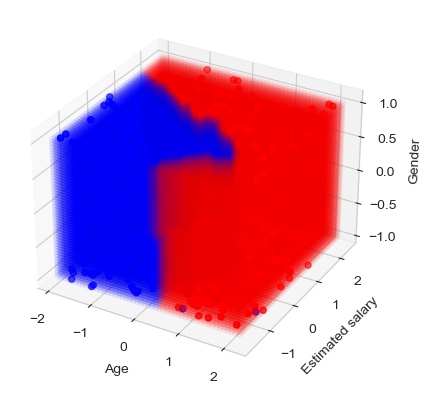

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier



# Train the k-NN model
k = 5
metric = 'euclidean'
knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
knn.fit(x_train, y_train)

# Generate a mesh grid of points
n_points = 50
x_min, x_max = np.min(x_train[:,0]), np.max(x_train[:,0])
y_min, y_max = np.min(x_train[:,1]), np.max(x_train[:,1])
z_min, z_max = np.min(x_train[:,2]), np.max(x_train[:,2])
xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, n_points),
                         np.linspace(y_min, y_max, n_points),
                         np.linspace(z_min, z_max, n_points))
x_mesh = np.column_stack([xx.ravel(), yy.ravel(), zz.ravel()])

# Predict the class of each point on the mesh grid
y_pred = knn.predict(x_mesh)

# Plot the decision boundary
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2], c=y_train, cmap='bwr')
ax.scatter(x_mesh[:,0], x_mesh[:,1], x_mesh[:,2], c=y_pred, alpha=0.05, cmap='bwr')
ax.set_xlabel('Age')
ax.set_ylabel('Estimated salary')
ax.set_zlabel('Gender')
plt.show()

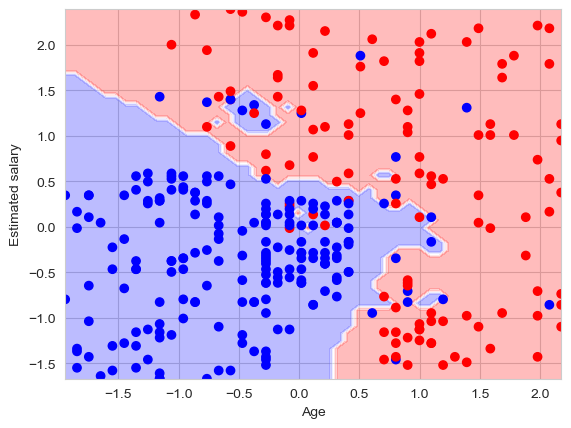

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



# Train the k-NN model
k = 5
metric = 'euclidean'
knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
knn.fit(x_train[:, :2], y_train) # Using only the first two features for 2D plot

# Generate a mesh grid of points
n_points = 50
x_min, x_max = np.min(x_train[:,0]), np.max(x_train[:,0])
y_min, y_max = np.min(x_train[:,1]), np.max(x_train[:,1])
xx, yy = np.meshgrid(np.linspace(x_min, x_max, n_points),
                     np.linspace(y_min, y_max, n_points))
x_mesh = np.column_stack([xx.ravel(), yy.ravel()])

# Predict the class of each point on the mesh grid
y_pred = knn.predict(x_mesh)

# Plot the decision boundary
fig, ax = plt.subplots()
ax.contourf(xx, yy, y_pred.reshape(xx.shape), alpha=0.3, cmap='bwr')
ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')
ax.set_xlabel('Age')
ax.set_ylabel('Estimated salary')
plt.show()

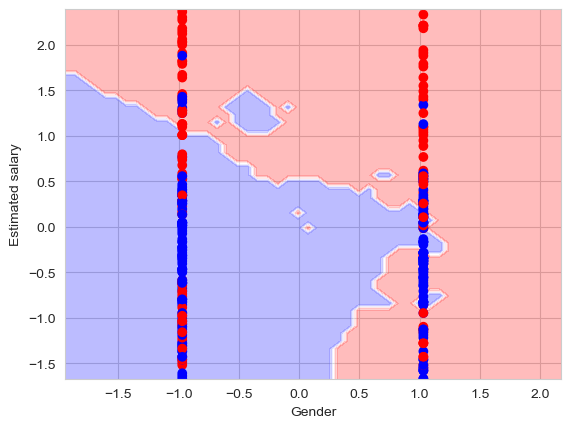

In [ ]:
fig, ax = plt.subplots()
ax.contourf(xx, yy, y_pred.reshape(xx.shape), alpha=0.3, cmap='bwr')
ax.scatter( x_train[:,2],x_train[:,1], c=y_train, cmap='bwr')
ax.set_xlabel('Gender')
ax.set_ylabel('Estimated salary')
plt.show()

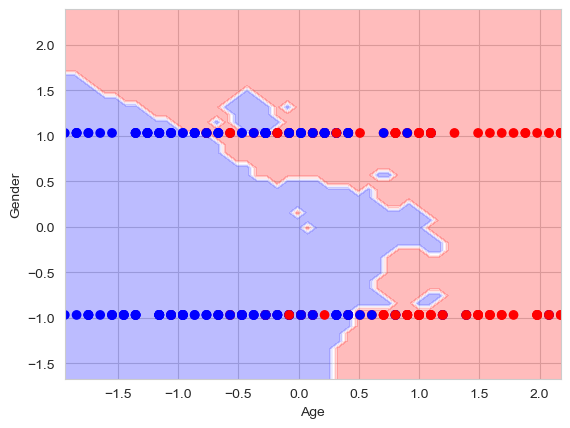

In [ ]:
fig, ax = plt.subplots()
ax.contourf(xx, yy, y_pred.reshape(xx.shape), alpha=0.3, cmap='bwr')
ax.scatter( x_train[:,0],x_train[:,2], c=y_train, cmap='bwr')
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
plt.show()